In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [4]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [5]:
tmp = df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [6]:
tmp = tmp[tmp.teamPosition != '']

In [7]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
8,TOP,22036,42737,5137
9,JUNGLE,35747,68033,6506
10,MIDDLE,57585,29526,6978
11,BOTTOM,38080,35156,5181
12,UTILITY,17153,35844,4576
...,...,...,...,...
71873,TOP,11814,10942,6051
71874,JUNGLE,1807,17352,4086
71875,MIDDLE,6144,7474,5064
71876,BOTTOM,10989,5144,6534


In [8]:
group_df = tmp.groupby('teamPosition').mean().round()

In [9]:
group_df.loc['BOTTOM']
group_df.iloc[0]

totalDamageDealtToChampions    21178.0
totalDamageTaken               18726.0
g_15                            5976.0
Name: BOTTOM, dtype: float64

In [10]:
# autopct =

Text(0.5, 1.0, '파이차트')

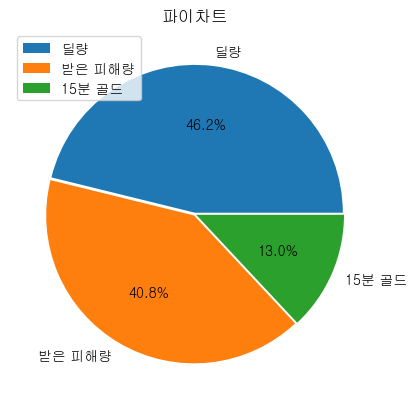

In [11]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'],labels = ['딜량','받은 피해량','15분 골드'],autopct = '%1.1f%%',
        explode = (0.01,0.01,0.01))
plt.grid(True)
plt.legend(loc=2)
plt.title('파이차트')

In [12]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
8,TOP,22036,42737,5137
9,JUNGLE,35747,68033,6506
10,MIDDLE,57585,29526,6978
11,BOTTOM,38080,35156,5181
12,UTILITY,17153,35844,4576
...,...,...,...,...
71873,TOP,11814,10942,6051
71874,JUNGLE,1807,17352,4086
71875,MIDDLE,6144,7474,5064
71876,BOTTOM,10989,5144,6534


In [13]:
my_tmp = tmp[['teamPosition','totalDamageDealtToChampions']]

In [14]:
my_tmp.set_index('teamPosition',inplace = True)

In [15]:
my_tmp

,totalDamageDealtToChampions
teamPosition,
TOP,22036
JUNGLE,35747
MIDDLE,57585
BOTTOM,38080
UTILITY,17153
...,...
TOP,11814
JUNGLE,1807
MIDDLE,6144


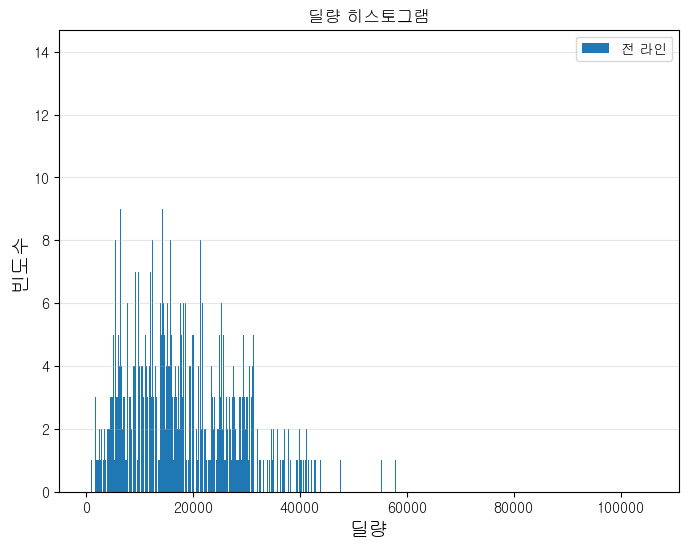

In [16]:
plt.figure(figsize =(8,6))
plt.hist(my_tmp, bins = len(my_tmp), label = '전 라인', rwidth = 0.9)

plt.xlabel('딜량', size = 14)
plt.ylabel('빈도수',size = 14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis = 'y', alpha = 0.3)

In [17]:
import seaborn as sns

In [18]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [19]:
df = get_df(url) 

In [20]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [21]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM',
          'HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [22]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [23]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
996,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
997,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
998,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


In [24]:
tmp = tmp.drop_duplicates()

In [25]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
965,태화관(구),1.0,유료,무료,유료,250000,500.0,1000.0
966,동일상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
974,숭인상가아파트 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
980,필운대로 도미노피자앞 이륜차 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


<Axes: title={'center': '주차장 유무료'}, xlabel='유무료', ylabel='count'>

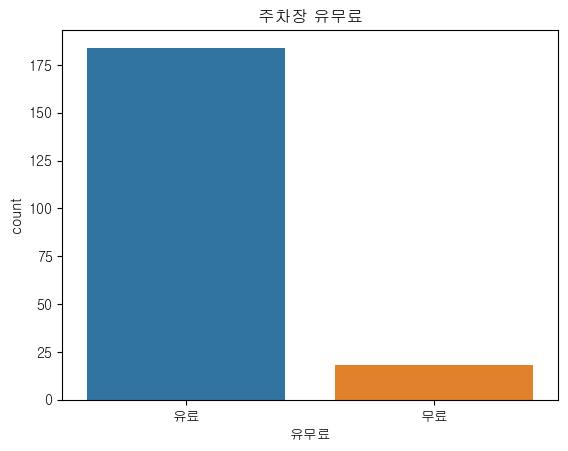

In [26]:
plt.figure()
plt.title('주차장 유무료')
sns.countplot(x = '유무료',data = tmp,order =['유료','무료'])

<Axes: title={'center': '기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

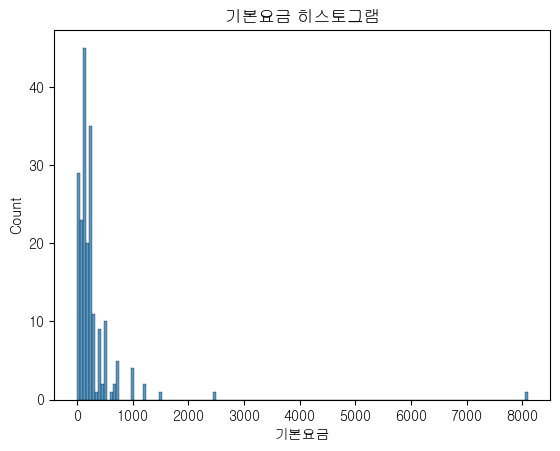

In [27]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x = tmp['기본요금'])

<Axes: xlabel='기본요금', ylabel='추가요금'>

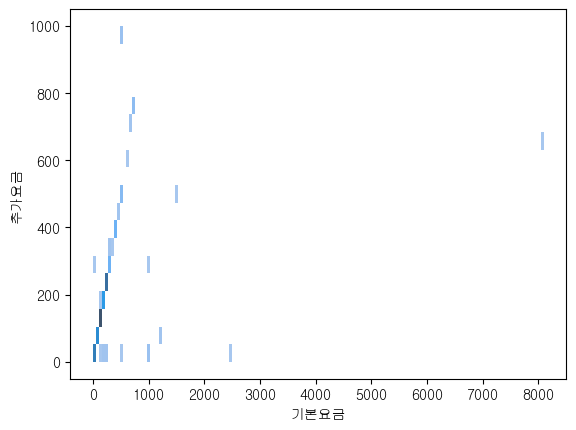

In [28]:
sns.histplot(x = tmp['기본요금'],y = tmp['추가요금'])

<Axes: xlabel='기본요금', ylabel='Density'>

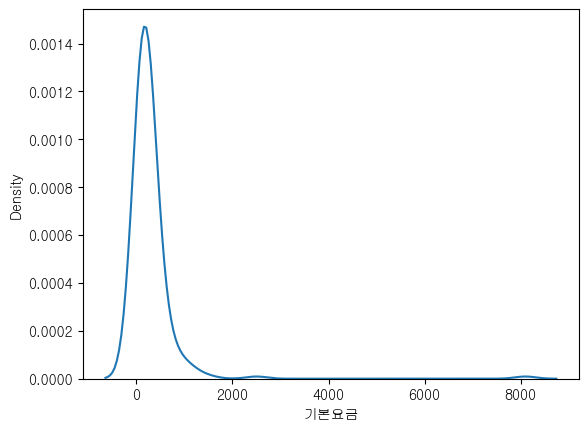

In [29]:
plt.figure()
sns.kdeplot(x=tmp['기본요금']) # kdeplot=분포도

In [72]:
conn = connect_mysql()
query = 'select * from lol_datas'
lol_df = pd.DataFrame(sql_execute_dict(conn,query))

# 포지션별중 1택 15분 골드와 20분 골드를 kdeplot으로 만들기

In [80]:
lol_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [81]:
lol = lol_df[['teamPosition','g_15','g_20']]

In [82]:
lol.columns=['포지션','15분 골드','20분 골드']

In [85]:
lol

,포지션,15분 골드,20분 골드
0,,19450,0
1,,19450,0
2,,16100,0
3,,16175,0
4,,19100,0
...,...,...,...
71873,TOP,6051,0
71874,JUNGLE,4086,0
71875,MIDDLE,5064,0
71876,BOTTOM,6534,0


In [87]:
my_lol = lol[lol.포지션 == 'JUNGLE']

In [88]:
my_lol

,포지션,15분 골드,20분 골드
9,JUNGLE,6506,9022
14,JUNGLE,6387,8977
19,JUNGLE,5798,0
24,JUNGLE,4317,0
39,JUNGLE,8695,0
...,...,...,...
71846,JUNGLE,5991,8523
71851,JUNGLE,5426,0
71856,JUNGLE,5155,0
71869,JUNGLE,4453,0


In [89]:
my_lol.set_index('포지션',inplace = True)

In [90]:
my_lol

,15분 골드,20분 골드
포지션,,
JUNGLE,6506,9022
JUNGLE,6387,8977
JUNGLE,5798,0
JUNGLE,4317,0
JUNGLE,8695,0
...,...,...
JUNGLE,5991,8523
JUNGLE,5426,0
JUNGLE,5155,0


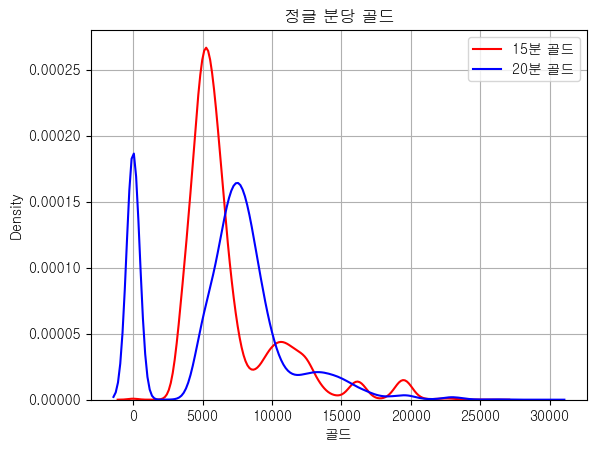

In [98]:
plt.figure()
sns.kdeplot(lol['15분 골드'],color = 'r', label = '15분 골드')
sns.kdeplot(lol['20분 골드'],color = 'b', label = '20분 골드')
plt.xlabel('골드')
plt.title('정글 분당 골드')
plt.legend(loc=1)
plt.grid()

In [99]:
import seaborn as sns

In [100]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [101]:
df = get_df(url) 

In [102]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [103]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM',
          'HOLIDAY_PAY_NM','FULLTIME_MONTHLY','RATES','ADD_RATES']]

In [104]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


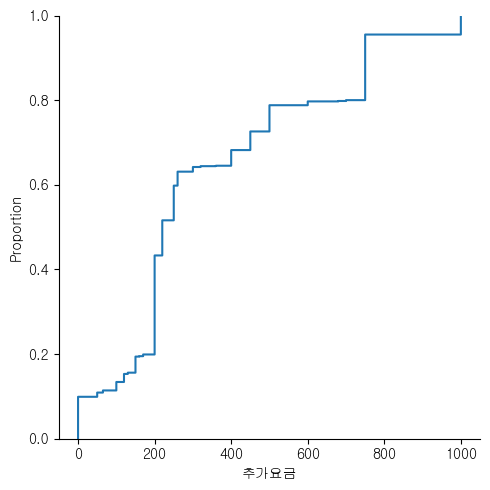

In [108]:
sns.displot(x = tmp['추가요금'],kind = 'ecdf') # ecdf = 비율

<Axes: xlabel='기본요금', ylabel='Density'>

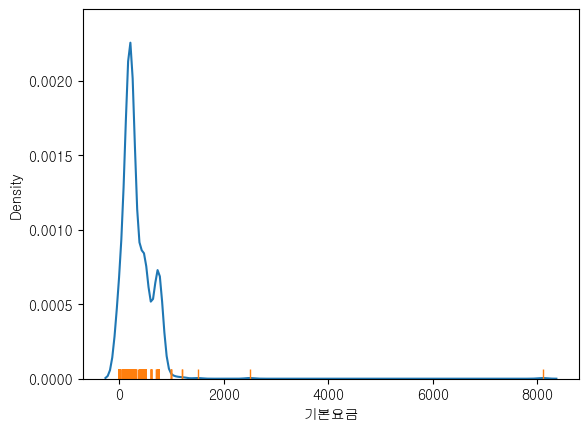

In [111]:
sns.kdeplot(x=tmp['기본요금'])
sns.rugplot(x=tmp['기본요금']) # 분포 모아준 느낌

<Axes: xlabel='주말유무료', ylabel='기본요금'>

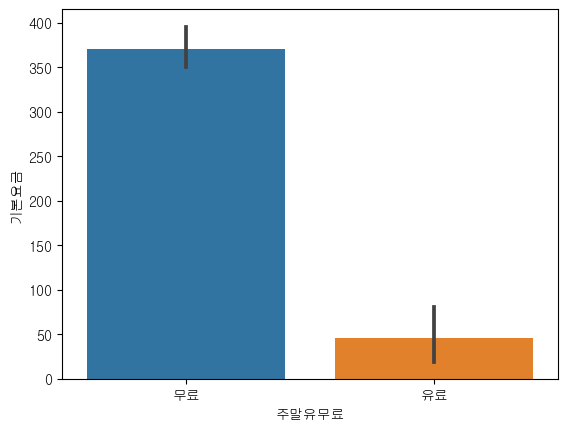

In [113]:
sns.barplot(x=tmp['주말유무료'],y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='count'>

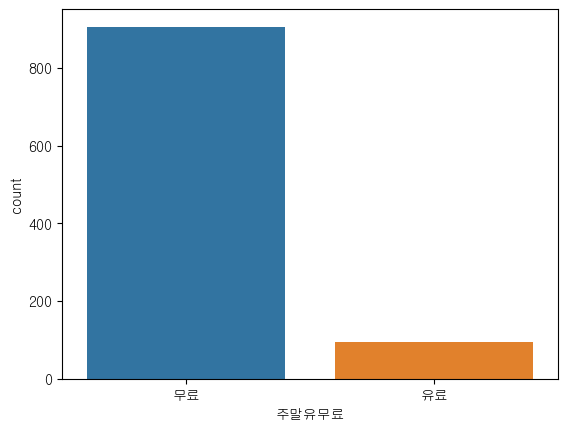

In [114]:
sns.countplot(x=tmp['주말유무료'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

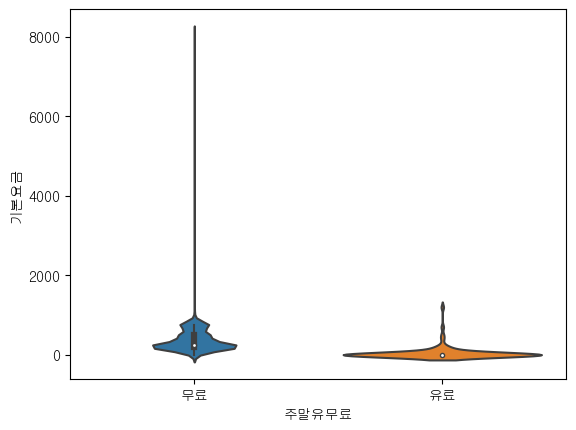

In [115]:
sns.violinplot(x=tmp['주말유무료'],y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

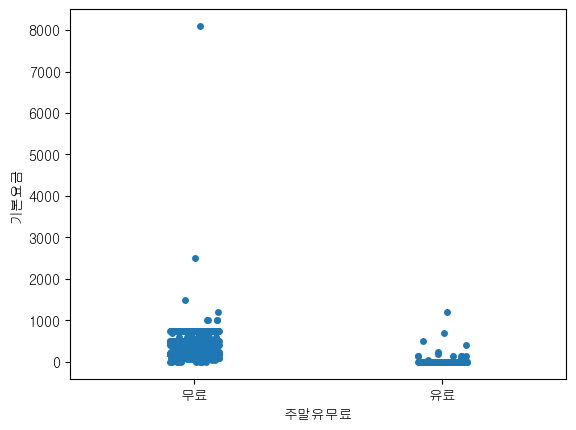

In [116]:
sns.stripplot(x=tmp['주말유무료'],y=tmp['기본요금'])

In [119]:
tmp.columns

Index(['주차장명', '주차수', '유무료', '주말유무료', '공휴일유무료', '월정기권금액', '기본요금', '추가요금'], dtype='object')

In [120]:
tmp.set_index('주차장명',inplace=True)

In [125]:
test = tmp[['주차수','기본요금','추가요금']]

In [126]:
test.corr()

,주차수,기본요금,추가요금
주차수,1.000000,0.002591,-0.167698
기본요금,0.002591,1.000000,0.607381
추가요금,-0.167698,0.607381,1.000000


<Axes: >

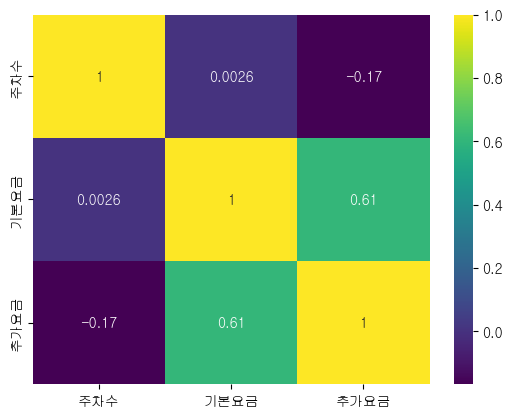

In [129]:
sns.heatmap(test.corr(),annot=True,cmap = 'viridis')

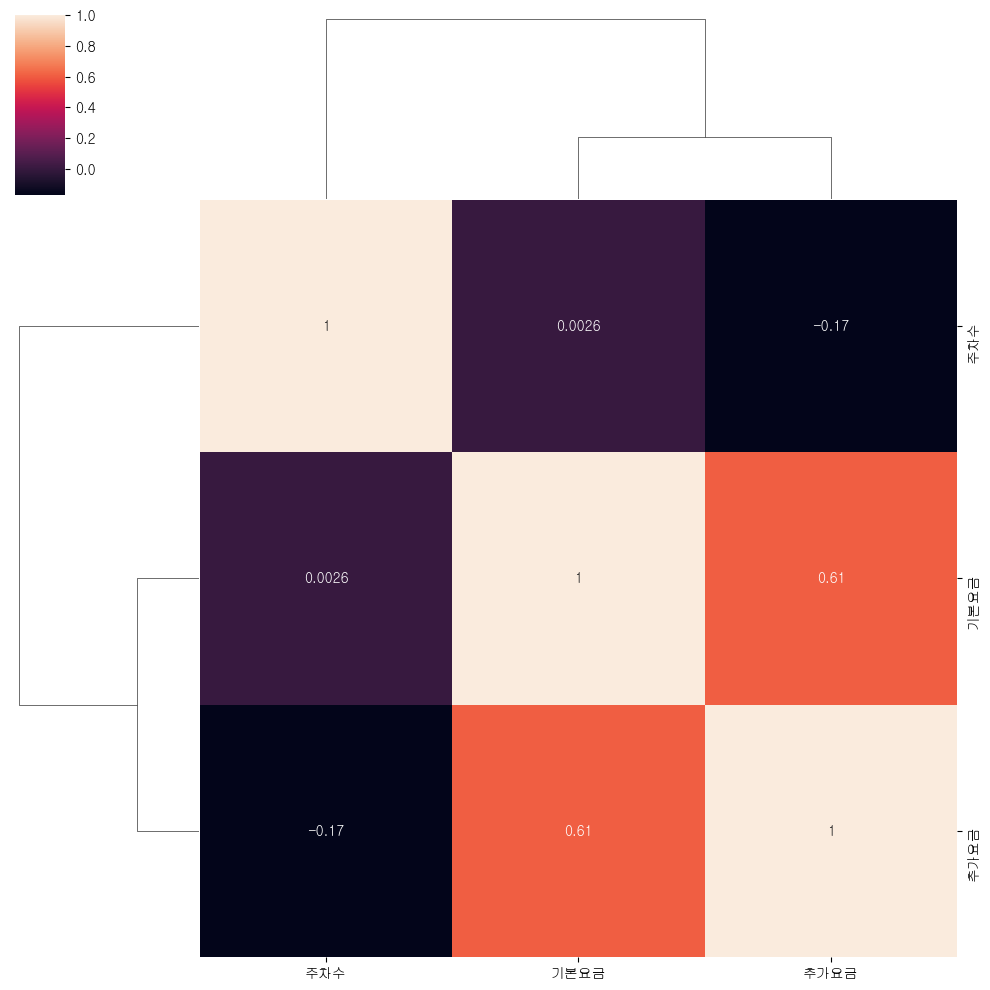

In [130]:
sns.clustermap(test.corr(),annot = True)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


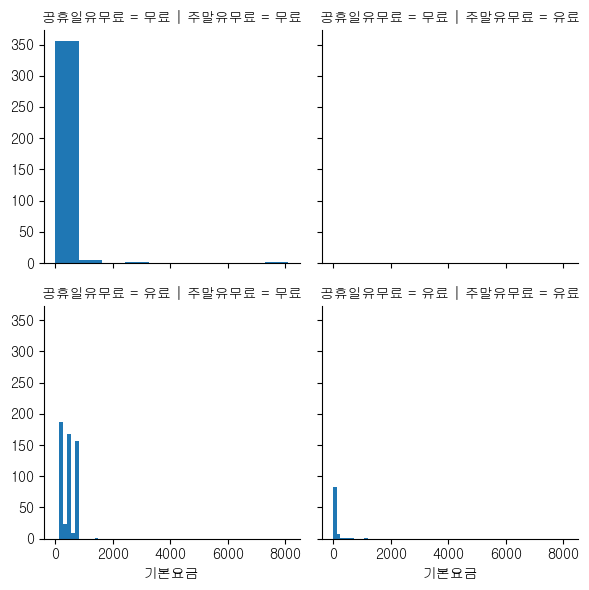

In [146]:
sns.FacetGrid(tmp,row = '공휴일유무료',col = '주말유무료').map(plt.hist,'기본요금') # ☆☆☆

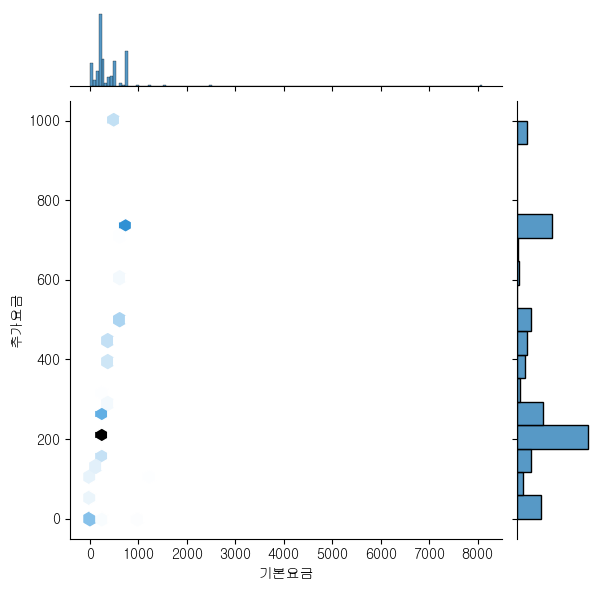

In [140]:
sns.jointplot(x=tmp['기본요금'],y=tmp['추가요금'],kind = 'hex')

<Axes: xlabel='기본요금', ylabel='추가요금'>

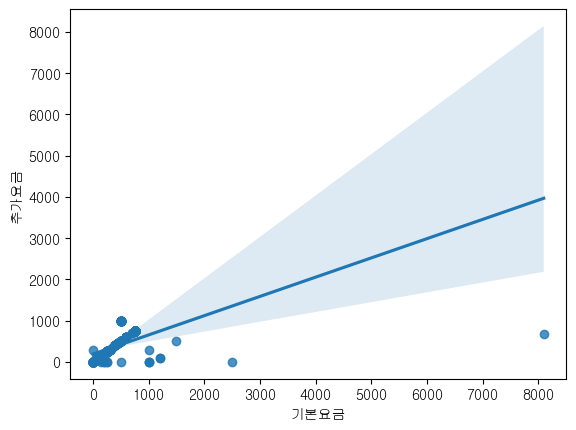

In [142]:
sns.regplot(x='기본요금',y='추가요금',data=tmp)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


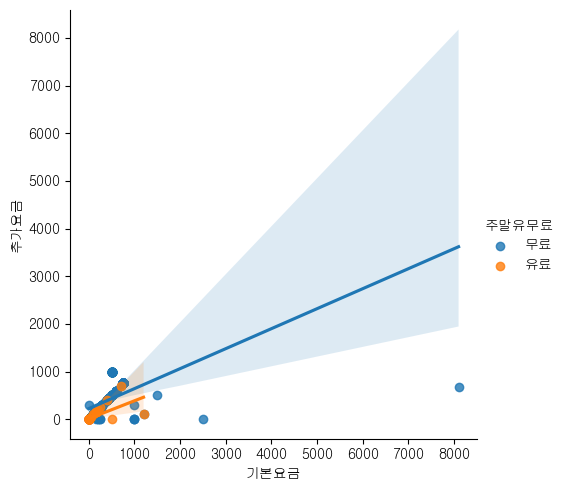

In [144]:
sns.lmplot(x='기본요금',y='추가요금',data = tmp,hue = '주말유무료') # hue = 구분점

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


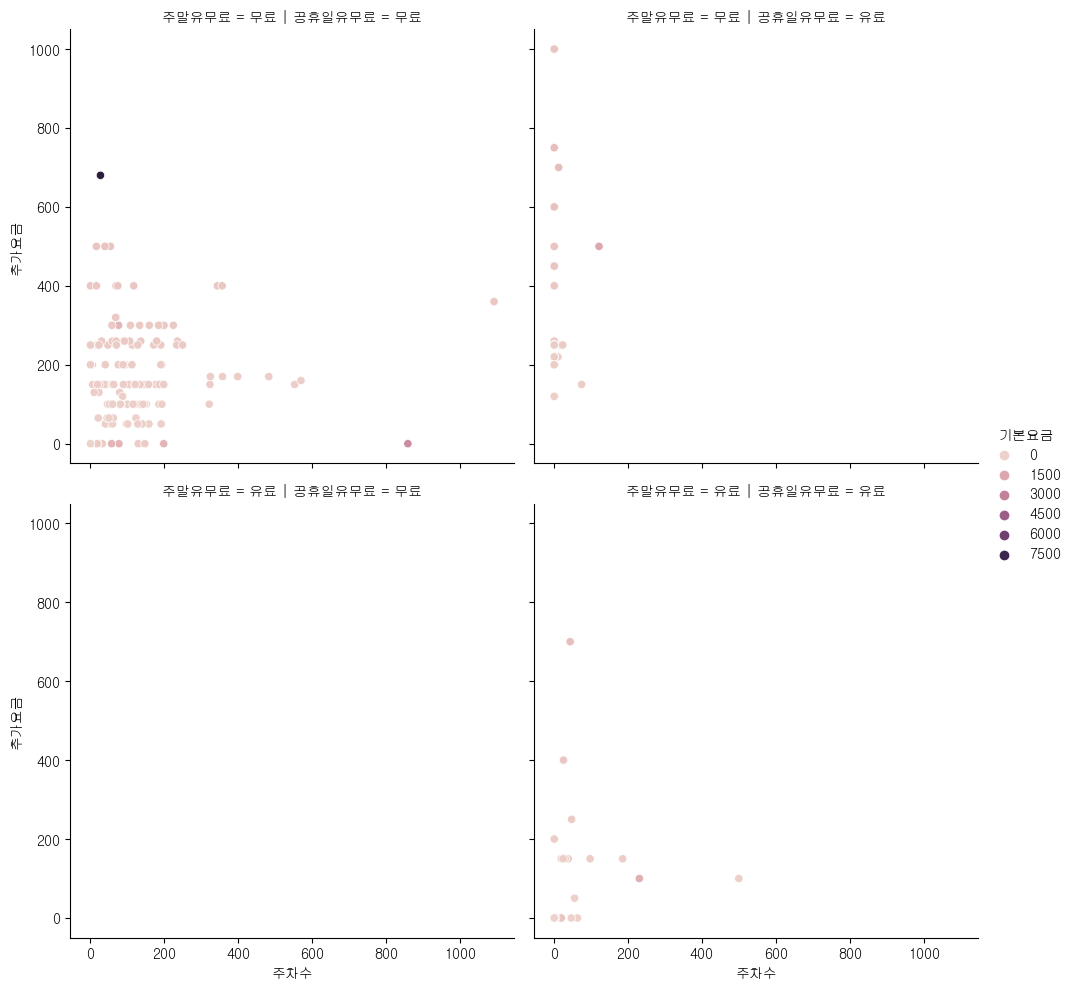

In [145]:
sns.relplot(x='주차수',y='추가요금',hue='기본요금',row='주말유무료',col='공휴일유무료',data=tmp)

In [147]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [148]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = pd.concat([df,pd.DataFrame(response.json())])

In [149]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-12-28T00:00:00,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57741000.0,1703736640926,5.494775e+10,9.495920e+02,57920000.0,-179000.0,-0.003090
1,KRW-BTC,2023-12-27T00:00:00,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3.965843e+03,57032000.0,888000.0,0.015570
2,KRW-BTC,2023-12-26T00:00:00,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,1703635199803,2.708228e+11,4.735230e+03,58042000.0,-1010000.0,-0.017401
3,KRW-BTC,2023-12-25T00:00:00,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,1703548799890,2.721330e+11,4.687209e+03,58002000.0,40000.0,0.000690
4,KRW-BTC,2023-12-24T00:00:00,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,1703462399990,2.200170e+11,3.729334e+03,59250000.0,-1248000.0,-0.021063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T00:00:00,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1686959997094,1.610391e+11,2.616515e+08,627.0,-3.0,-0.004785
196,KRW-XRP,2023-06-15T00:00:00,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1686873599460,1.663204e+11,2.660830e+08,631.0,-4.0,-0.006339
197,KRW-XRP,2023-06-14T00:00:00,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,1686787200001,2.592919e+11,3.998507e+08,679.0,-48.0,-0.070692
198,KRW-XRP,2023-06-13T00:00:00,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,1686700799794,4.851964e+11,6.910409e+08,689.0,-10.0,-0.014514


In [150]:
my_df = df[['market','candle_date_time_kst','opening_price','high_price',
            'low_price','trade_price','candle_acc_trade_price','candle_acc_trade_volume']].copy()
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,KRW-BTC,2023-12-28T09:00:00,57920000.0,58468000.0,57474000.0,57741000.0,5.494775e+10,9.495920e+02
1,KRW-BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
2,KRW-BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
3,KRW-BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
4,KRW-BTC,2023-12-24T09:00:00,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03
...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
196,KRW-XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
197,KRW-XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08
198,KRW-XRP,2023-06-13T09:00:00,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08


# 첫번째 전처리 -market에서 코인의 이름만 남기기
# 두번째 전처리 -candle_date_time_kst 날짜만 남기기

In [160]:
my_df['market']=df.market.str.replace('KRW-','')

In [164]:
my_df['candle_date_time_kst']= df.candle_date_time_kst.str.replace('T09:00:00','')

In [165]:
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume,candle_date_time_kst\t
0,BTC,2023-12-28,57920000.0,58468000.0,57474000.0,57741000.0,5.494775e+10,9.495920e+02,2023-12-28
1,BTC,2023-12-27,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03,2023-12-27
2,BTC,2023-12-26,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03,2023-12-26
3,BTC,2023-12-25,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03,2023-12-25
4,BTC,2023-12-24,59249000.0,59600000.0,58000000.0,58002000.0,2.200170e+11,3.729334e+03,2023-12-24
...,...,...,...,...,...,...,...,...,...
195,XRP,2023-06-16,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08,2023-06-16
196,XRP,2023-06-15,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08,2023-06-15
197,XRP,2023-06-14,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08,2023-06-14
198,XRP,2023-06-13,689.0,735.0,664.0,679.0,4.851964e+11,6.910409e+08,2023-06-13


In [166]:
help(plotly.offline.iplot)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)
    Draw plotly graphs inside an IPython or Jupyter notebook
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enterprise
    link_text (default='Export to plot.ly') -- the text of export link
    validate (default=True) -- validate that all of the keys in the figure
                          

In [167]:
import plotly.express as px

In [171]:
plotly.offline.iplot({
    "data" : [go.Scatter(x=[1,2,3,4], y=[4,3,2,1])],
    "layout": go.Layout(title = 'Siuuuuu')
})

In [173]:
fig = px.scatter(my_df[my_df.market=='BTC'],
                x = 'candle_date_time_kst',
                y = 'trade_price')

plotly.offline.iplot(fig)
# = fig.show()

In [176]:
fig = px.bar(my_df[my_df.market=='BTC'][-10:],
                x = 'candle_date_time_kst',
                y = 'trade_price')

plotly.offline.iplot(fig)
# = fig.show()

In [179]:
fig = px.line(my_df[my_df.market=='BTC'],
                x = 'candle_date_time_kst',
                y = 'trade_price')

plotly.offline.iplot(fig)
# = fig.show()

In [180]:
tmp_df = lol_df[['championName','totalDamageDealtToChampions','totalDamageTaken']]

In [181]:
tmp_df

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Kaisa,81101,24333
1,Akali,75083,27058
2,Taric,19873,33831
3,Gragas,35828,33945
4,XinZhao,71490,19714
...,...,...,...
71873,Jax,11814,10942
71874,Singed,1807,17352
71875,Yone,6144,7474
71876,Aphelios,10989,5144


# 산점도 그래프 -scatter
# ChampionName을 기준으로 평균내기
# x는 딜량 y는 받은 데미지
# color = 'championName'
# plotly 제작

In [198]:
cmp_df = tmp_df.groupby('championName').mean().round().reset_index()

In [199]:
cmp_df

,championName,totalDamageDealtToChampions,totalDamageTaken
0,Aatrox,22244.0,33878.0
1,Ahri,22302.0,21309.0
2,Akali,23199.0,27813.0
3,Akshan,23246.0,20725.0
4,Alistar,12142.0,32355.0
...,...,...,...
161,Zeri,25238.0,22042.0
162,Ziggs,28127.0,18311.0
163,Zilean,12849.0,19486.0
164,Zoe,26343.0,20344.0


In [202]:
fig = px.scatter(cmp_df,
                x = 'totalDamageDealtToChampions',
                y = 'totalDamageTaken',
                color = 'championName')

plotly.offline.iplot(fig)
# = fig.show()

# 챔피언 시너지 or 2:2 구도 분석

- blue팀 정글포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONAME -> j_champ) (테이블 이름 - blue_jungle)
- blue팀 탑포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONAME -> t_champ) (테이블 이름 - blue_top)
- blue팀끼리 merge 

- red 동일하게 정글, 탑 뽑아내서 merge


- blue팀과 red팀의 데이터를 merge하기 위해서 enemy_blue / enemy_red 라는 데이터프레임 제작 
- 이후 championName들을 rename을 통해 각각 enemy_j_champ_cham enemy_t_champ으로 변환


- blue팀입장에서 red팀의 데이터 merge
- red 팀 입장에서 blue팀 데이터 merge

- 위에서 만들어진 merge테이블을 concat을 이용해서 하나의 데이터 테이블로 만들기
- games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블 

In [333]:
lol_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [284]:
blue_team = lol_df[lol_df.teamId == 100]

In [285]:
blue_j = blue_team[blue_team.teamPosition == 'JUNGLE']

In [286]:
blue_j = blue_j[['gameId','championName']]

In [287]:
blue_j.columns ='gameId','j_champ'

In [288]:
blue_t = blue_team[blue_team.teamPosition == 'TOP']

In [289]:
blue_t = blue_t[['gameId','championName','win']]

In [290]:
blue_t.columns ='gameId','t_champ','win'

In [307]:
blue_merge = blue_j.merge(blue_t,on = ('gameId'))

In [308]:
blue_merge

,gameId,j_champ,t_champ,win
0,KR_6604309114,Trundle,KSante,False
1,KR_6606477334,Elise,Fiora,True
2,KR_6606877275,Zac,Darius,True
3,KR_6606923700,LeeSin,Yone,False
4,KR_6607288080,Karthus,Olaf,True
...,...,...,...,...
5645,KR_6871466214,Evelynn,Yasuo,True
5646,KR_6871473519,JarvanIV,Irelia,False
5647,KR_6871487336,Graves,Irelia,True
5648,KR_6871491916,Shaco,Irelia,True


In [293]:
red_team = lol_df[lol_df.teamId == 200]

In [294]:
red_j = red_team[red_team.teamPosition == 'JUNGLE']

In [295]:
red_j = red_j[['gameId','championName']]

In [296]:
red_j.columns ='gameId','j_champ'

In [297]:
red_t = red_team[red_team.teamPosition == 'TOP']

In [298]:
red_t = red_t[['gameId','championName','win']]

In [299]:
red_t.columns ='gameId','t_champ','win'

In [305]:
red_merge = red_j.merge(red_t,on = ('gameId'))

In [306]:
red_merge

,gameId,j_champ,t_champ,win
0,KR_6604309114,MasterYi,Illaoi,True
1,KR_6606477334,Lillia,Aatrox,False
2,KR_6606877275,Diana,Irelia,False
3,KR_6606923700,Sejuani,Varus,True
4,KR_6607288080,Sylas,Aatrox,False
...,...,...,...,...
5646,KR_6871466214,Sylas,Renekton,False
5647,KR_6871473519,Darius,Renekton,True
5648,KR_6871487336,Nocturne,Renekton,False
5649,KR_6871491916,Briar,Shaco,False


In [310]:
enemy_blue = red_merge

In [311]:
enemy_red = blue_merge

In [318]:
blue_team = enemy_blue.merge(enemy_red,on = ('gameId'))

In [319]:
blue_team

,gameId,j_champ_x,t_champ_x,win_x,j_champ_y,t_champ_y,win_y
0,KR_6604309114,MasterYi,Illaoi,True,Trundle,KSante,False
1,KR_6606477334,Lillia,Aatrox,False,Elise,Fiora,True
2,KR_6606877275,Diana,Irelia,False,Zac,Darius,True
3,KR_6606923700,Sejuani,Varus,True,LeeSin,Yone,False
4,KR_6607288080,Sylas,Aatrox,False,Karthus,Olaf,True
...,...,...,...,...,...,...,...
5645,KR_6871466214,Sylas,Renekton,False,Evelynn,Yasuo,True
5646,KR_6871473519,Darius,Renekton,True,JarvanIV,Irelia,False
5647,KR_6871487336,Nocturne,Renekton,False,Graves,Irelia,True
5648,KR_6871491916,Briar,Shaco,False,Shaco,Irelia,True


In [325]:
blue_team.columns =['gameId','j_champ','t_champ','win','enemy_j_champ','enemy_t_champ','win']

In [326]:
blue_team

,gameId,j_champ,t_champ,win,enemy_j_champ,enemy_t_champ,win
0,KR_6604309114,MasterYi,Illaoi,True,Trundle,KSante,False
1,KR_6606477334,Lillia,Aatrox,False,Elise,Fiora,True
2,KR_6606877275,Diana,Irelia,False,Zac,Darius,True
3,KR_6606923700,Sejuani,Varus,True,LeeSin,Yone,False
4,KR_6607288080,Sylas,Aatrox,False,Karthus,Olaf,True
...,...,...,...,...,...,...,...
5645,KR_6871466214,Sylas,Renekton,False,Evelynn,Yasuo,True
5646,KR_6871473519,Darius,Renekton,True,JarvanIV,Irelia,False
5647,KR_6871487336,Nocturne,Renekton,False,Graves,Irelia,True
5648,KR_6871491916,Briar,Shaco,False,Shaco,Irelia,True


In [327]:
red_team = enemy_red.merge(enemy_blue,on = ('gameId'))

In [328]:
red_team

,gameId,j_champ_x,t_champ_x,win_x,j_champ_y,t_champ_y,win_y
0,KR_6604309114,Trundle,KSante,False,MasterYi,Illaoi,True
1,KR_6606477334,Elise,Fiora,True,Lillia,Aatrox,False
2,KR_6606877275,Zac,Darius,True,Diana,Irelia,False
3,KR_6606923700,LeeSin,Yone,False,Sejuani,Varus,True
4,KR_6607288080,Karthus,Olaf,True,Sylas,Aatrox,False
...,...,...,...,...,...,...,...
5645,KR_6871466214,Evelynn,Yasuo,True,Sylas,Renekton,False
5646,KR_6871473519,JarvanIV,Irelia,False,Darius,Renekton,True
5647,KR_6871487336,Graves,Irelia,True,Nocturne,Renekton,False
5648,KR_6871491916,Shaco,Irelia,True,Briar,Shaco,False


In [329]:
red_team.columns =['gameId','j_champ','t_champ','win','enemy_j_champ','enemy_t_champ','win']

In [330]:
red_team

,gameId,j_champ,t_champ,win,enemy_j_champ,enemy_t_champ,win
0,KR_6604309114,Trundle,KSante,False,MasterYi,Illaoi,True
1,KR_6606477334,Elise,Fiora,True,Lillia,Aatrox,False
2,KR_6606877275,Zac,Darius,True,Diana,Irelia,False
3,KR_6606923700,LeeSin,Yone,False,Sejuani,Varus,True
4,KR_6607288080,Karthus,Olaf,True,Sylas,Aatrox,False
...,...,...,...,...,...,...,...
5645,KR_6871466214,Evelynn,Yasuo,True,Sylas,Renekton,False
5646,KR_6871473519,JarvanIV,Irelia,False,Darius,Renekton,True
5647,KR_6871487336,Graves,Irelia,True,Nocturne,Renekton,False
5648,KR_6871491916,Shaco,Irelia,True,Briar,Shaco,False


In [331]:
team_df = pd.concat([blue_team, red_team])

In [332]:
team_df

,gameId,j_champ,t_champ,win,enemy_j_champ,enemy_t_champ,win
0,KR_6604309114,MasterYi,Illaoi,True,Trundle,KSante,False
1,KR_6606477334,Lillia,Aatrox,False,Elise,Fiora,True
2,KR_6606877275,Diana,Irelia,False,Zac,Darius,True
3,KR_6606923700,Sejuani,Varus,True,LeeSin,Yone,False
4,KR_6607288080,Sylas,Aatrox,False,Karthus,Olaf,True
...,...,...,...,...,...,...,...
5645,KR_6871466214,Evelynn,Yasuo,True,Sylas,Renekton,False
5646,KR_6871473519,JarvanIV,Irelia,False,Darius,Renekton,True
5647,KR_6871487336,Graves,Irelia,True,Nocturne,Renekton,False
5648,KR_6871491916,Shaco,Irelia,True,Briar,Shaco,False
